<a href="https://colab.research.google.com/github/SankarshanaaSagaram/solid-octo-winner/blob/main/mrm_task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dependencies

In [288]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


#Importing Data and Preprocessing

In [289]:
# loading the data from the csv file to pandas
country_dataset = pd.read_csv('/content/Country-data.csv')

In [290]:
# inspecting the first 5 rows of our dataset
country_dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [291]:
# checking the number of rows and columns
country_dataset.shape

(167, 10)

In [292]:
# getting further information about the given data
country_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [293]:
# checking the number of missing values
country_dataset.isnull().sum()


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [294]:
country_dataset.drop(["country"], axis = 1, inplace = True)

In [295]:
country_dataset

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Even though we can see that the raw data is clear and nothing is missing, preprocessing is necessary

# Implementing Principal Component Analysis to reduce dimensionality in the dataset

In [296]:
 #scaling and transforming the dataset
 scaler = MinMaxScaler()
 scaler.fit(country_dataset)

MinMaxScaler()

In [297]:
scaled_data = scaler.transform(country_dataset)

In [298]:
scaled_data


array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [299]:
pca = PCA(n_components=2)

In [300]:
pca.fit(scaled_data)

PCA(n_components=2)

In [301]:
x_pca = pca.transform(scaled_data)

In [302]:
scaled_data.shape

(167, 9)

In [303]:
#we can see that data has been scaled down to 2 features
x_pca.shape

(167, 2)

In [304]:
scaled_data

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [305]:
x_pca

array([[-0.59907764,  0.09549001],
       [ 0.1584743 , -0.2120924 ],
       [ 0.00368552, -0.13586725],
       [-0.65023499,  0.27597526],
       [ 0.20071124, -0.06466223],
       [ 0.112534  , -0.20604633],
       [ 0.08748612, -0.24430696],
       [ 0.44078359,  0.01628159],
       [ 0.52052639,  0.11505267],
       [ 0.03880915, -0.12198813],
       [ 0.25330504, -0.03709248],
       [ 0.28004875,  0.08194452],
       [-0.10721304, -0.24817007],
       [ 0.23240595, -0.10625665],
       [ 0.18238383, -0.10352266],
       [ 0.49552529,  0.24168217],
       [ 0.0343959 , -0.05258709],
       [-0.57211533,  0.08891622],
       [-0.0072184 , -0.06228781],
       [-0.12086723, -0.09859734],
       [ 0.25999884, -0.22215393],
       [-0.15372061,  0.02940304],
       [ 0.13962489, -0.26315962],
       [ 0.42041602,  0.19485164],
       [ 0.20775216, -0.12550836],
       [-0.65389251,  0.11320578],
       [-0.60975439,  0.11313395],
       [-0.1091356 , -0.03051148],
       [-0.57452028,

# KMeans Clustering to Group the New Data

In [306]:
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(x_pca)
	kmeanModel.fit(x_pca)

	
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(x_pca, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / x_pca.shape[0]
	mapping2[k] = kmeanModel.inertia_


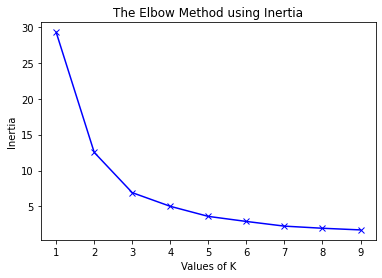

In [307]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [308]:
#using 3 clusters as graph starts becoming flat from k=3 in the elbow method
kmeans = KMeans(n_clusters=3)

In [309]:
kmeans.fit(x_pca)

KMeans(n_clusters=3)

In [310]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 1,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [311]:
#identifying the cluster centers
clusters = kmeans.cluster_centers_

In [312]:
clusters

array([[-0.50242118,  0.09786908],
       [ 0.45848149,  0.14084711],
       [ 0.06854311, -0.11872492]])

In [313]:
y_km = kmeans.fit_predict(x_pca)

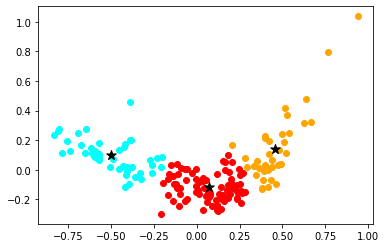

In [314]:
#plotting the kmeans clusters for visualization
plt.scatter(x_pca[y_km == 0,0], x_pca[y_km == 0,1], color='red')
plt.scatter(x_pca[y_km == 1,0], x_pca[y_km == 1,1], color='cyan')
plt.scatter(x_pca[y_km == 2,0], x_pca[y_km == 2,1], color='orange')

plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=100, color='black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=100, color='black')
plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=100, color='black')